#Imports

In [171]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from IPython.display import display
import matplotlib.pyplot as plt
from tensorflow.keras.utils import array_to_img

import itertools

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
from numpy.random import seed
seed(888)
tf.random.set_seed(
    seed(404)
)

In [3]:
from keras.datasets import cifar10

#Get the Data

In [4]:
(x_train_all, y_train_all),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


#constants

In [49]:
LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

#Explore the data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

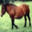

In [9]:
pic = array_to_img(x_train_all[7])
display(pic)

In [10]:
y_train_all.shape

(50000, 1)

In [11]:
y_train_all[7][0]

7

In [12]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

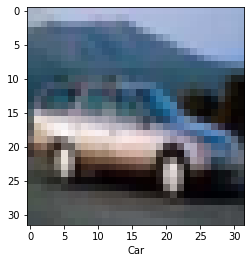

In [13]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]])
plt.show()

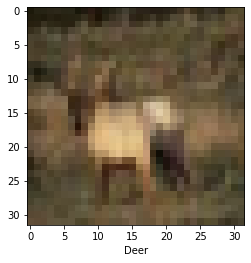

In [ ]:
plt.imshow(x_train_all[3])
plt.xlabel(LABEL_NAMES[y_train_all[3][0]])
plt.show()

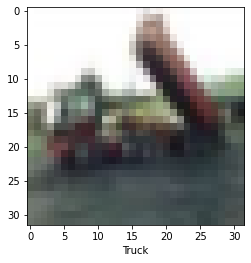

In [ ]:
plt.imshow(x_train_all[2])
plt.xlabel(LABEL_NAMES[y_train_all[2][0]])
plt.show()

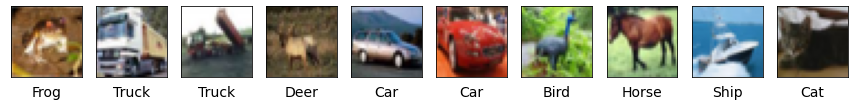

In [26]:
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
  plt.imshow(x_train_all[i])

In [27]:
x_train_all[0].shape

(32, 32, 3)

In [30]:
nr_images, x, y, c = x_train_all.shape
print(f"images = {nr_images} \t | width = {x} \t| height = {y} \t| channels = {c}")

images = 50000 	 | width = 32 	| height = 32 	| channels = 3


In [32]:
x_test.shape

(10000, 32, 32, 3)

preprocess data

In [34]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [35]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [36]:
type(x_train_all[0][0][0][0])

numpy.float64

In [37]:
x_train_all[0][0][0][0]

0.23137254901960785

##flatten dataset

In [39]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [40]:
x_train_all.shape

(50000, 3072)

In [41]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)
print(f'Shape of x_test = {x_test.shape}')

Shape of x_test = (10000, 3072)


## splitting out validation 

In [43]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [47]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

In [48]:
y_train.shape

(40000, 1)

### small training set to play with

In [50]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

#build the model - define the nn using keras

3072 = 32 x 32 x 3 in the dense layer because its a picture, 6 units, activation = relu

In [82]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_hidden4')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [83]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_hidden4'))

model_2.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [55]:
type(model_1)

keras.engine.sequential.Sequential

In [65]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_hidden4 (Dense)          (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Fit the Model

In [66]:
samples_per_batch = 1000

In [ ]:
from keras.callbacks import EarlyStopping
%%time
nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, 
            epochs=nr_epochs, verbose=1, validation_data=(x_val, y_val))

In [ ]:
%%time
nr_epochs = 150
model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, 
            epochs=nr_epochs, verbose=1, validation_data=(x_val, y_val))

In [ ]:
%%time
nr_epochs = 150
model_1.fit(x_train, y_train, batch_size=samples_per_batch, 
            epochs=nr_epochs, verbose=1, validation_data=(x_val, y_val))

In [ ]:
%%time
nr_epochs = 150
model_2.fit(x_train, y_train, batch_size=samples_per_batch, 
            epochs=nr_epochs, verbose=1, validation_data=(x_val, y_val))

# Predictions

In [88]:
x_val[0].shape

(3072,)

In [90]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [93]:
np.set_printoptions(precision=3)

In [95]:
model_2.predict(test)

1/1 [==============================] - 0s 56ms/step


array([[1.559e-02, 2.943e-03, 1.092e-01, 9.962e-02, 1.199e-01, 6.145e-02,
        5.752e-01, 1.539e-02, 4.902e-04, 2.625e-04]], dtype=float32)

In [96]:
model_2.predict(x_val).shape

313/313 [==============================] - 2s 6ms/step


(10000, 10)

In [99]:
predict_x = model_2.predict(test)
np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 31ms/step


array([6])

In [100]:
y_val[0]

array([6], dtype=uint8)

In [135]:
for i in range(10):
  test = np.expand_dims(x_val[i], axis=0)
  np.set_printoptions(precision=3)
  predict_x = model_2.predict(test)
  for i in range(len(predict_x)):
    for j in range(10):
      preds = np.argmax(predict_x,axis=1)
      print(f'actual:  {y_val[j][0]}, predicted = {preds}')

1/1 [==============================] - 0s 25ms/step
actual:  6, predicted = [6]
actual:  9, predicted = [6]
actual:  9, predicted = [6]
actual:  4, predicted = [6]
actual:  1, predicted = [6]
actual:  1, predicted = [6]
actual:  2, predicted = [6]
actual:  7, predicted = [6]
actual:  8, predicted = [6]
actual:  3, predicted = [6]
1/1 [==============================] - 0s 23ms/step
actual:  6, predicted = [8]
actual:  9, predicted = [8]
actual:  9, predicted = [8]
actual:  4, predicted = [8]
actual:  1, predicted = [8]
actual:  1, predicted = [8]
actual:  2, predicted = [8]
actual:  7, predicted = [8]
actual:  8, predicted = [8]
actual:  3, predicted = [8]
1/1 [==============================] - 0s 25ms/step
actual:  6, predicted = [9]
actual:  9, predicted = [9]
actual:  9, predicted = [9]
actual:  4, predicted = [9]
actual:  1, predicted = [9]
actual:  1, predicted = [9]
actual:  2, predicted = [9]
actual:  7, predicted = [9]
actual:  8, predicted = [9]
actual:  3, predicted = [9]
1/1 

In [145]:
predictions = np.array([np.argmax(prediction) for prediction in model_2.predict(x_val[:11])])

1/1 [==============================] - 0s 42ms/step


In [147]:
predictions

array([6, 8, 9, 4, 0, 9, 2, 7, 8, 9, 4])

## Evaluations

In [148]:
model_2.metrics_names

['loss', 'accuracy']

In [150]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'test loss is: {test_loss:0.3} and test accuracy is:{test_accuracy:0.1%}')

313/313 [==============================] - 2s 6ms/step - loss: 1.4092 - accuracy: 0.5096
test loss is: 1.41 and test accuracy is:51.0%


## Confusion Matrix

In [152]:
predictions = np.array([np.argmax(prediction) for prediction in model_2.predict(x_test)])

313/313 [==============================] - 3s 8ms/step


In [153]:
conf_matrix = confusion_matrix(y_test, predictions )

In [155]:
conf_matrix.shape

(10, 10)

In [177]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [176]:
nr_rows

array([555,  25, 114,  21,  33,  13,  31,  24, 146,  38])

In [158]:
conf_matrix.max()

667

In [159]:
conf_matrix.min()

5

In [172]:
conf_matrix[0]

array([555,  25, 114,  21,  33,  13,  31,  24, 146,  38])

In [162]:
NR_CLASSES = 10

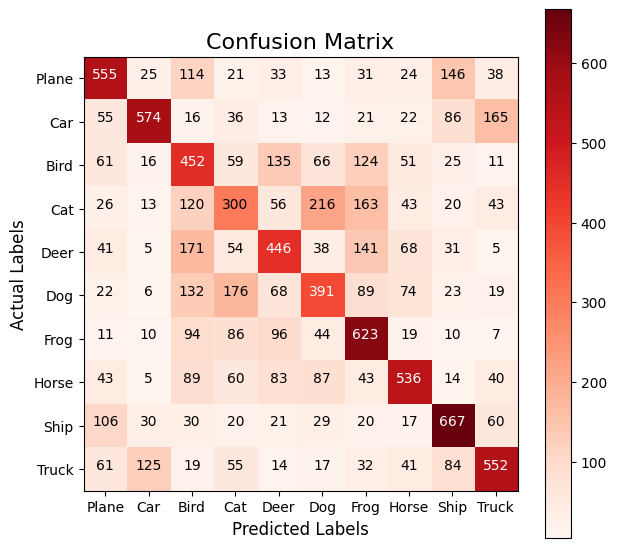

In [194]:
plt.figure(figsize=(7,7), dpi=100)
plt.imshow(conf_matrix, cmap='Reds')

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
  plt.text(j, i, conf_matrix[i,j], horizontalalignment='center',
           color='white' if conf_matrix[i,j] > conf_matrix.max() / 2 else 'black')


plt.show()

In [185]:
#true positives
np.diag(conf_matrix)

array([555, 574, 452, 300, 446, 391, 623, 536, 667, 552])

In [186]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.555, 0.574, 0.452, 0.3  , 0.446, 0.391, 0.623, 0.536, 0.667,
       0.552])

In [187]:
#false positives
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.566, 0.71 , 0.365, 0.346, 0.462, 0.428, 0.484, 0.599, 0.603,
       0.587])

In [189]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 50.96%


In [190]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 51.50%


In [193]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'f1 score is {f1_score:.2%}')

f1 score is 51.23%
